# How the trace of $tr\{R\}$ is used?

In the context of adaptive filtering and signal processing, the trace of the autocorrelation matrix $ R $ of the input signal plays a significant role in analyzing and determining the behavior of adaptive algorithms such as the Least Mean Squares (LMS) algorithm. The autocorrelation matrix $ R $ is a crucial element that characterizes the statistical properties of the input signal. Understanding how the trace of this matrix is used can help in both theoretical analyses and practical implementations of these algorithms.

### Definition and Importance of the Trace of R

The autocorrelation matrix $R_{\mathbf{X}\mathbf{X}} $ is defined for a signal vector $ \mathbf{x} $ (which could represent, for instance, samples of a signal at different times) as:
$ R_{\mathbf{X}\mathbf{X}} = E[\mathbf{x} \mathbf{x}^T] $
where $ E $ denotes the expectation operator, and $ \mathbf{x}^T $ is the transpose of $ \mathbf{x} $.

The trace of the matrix $ R $, denoted as $ \text{Tr}(R) $, is the sum of its diagonal elements. Since the diagonal elements of $ R $ are the autocorrelations at zero lag (i.e., the variances of the individual components of $ \mathbf{x} $), the trace represents the total power or energy of the signal over all its components.

### Role of Trace of R in Adaptive Filtering

1. **Stability and Convergence**: In adaptive filters like the LMS algorithm, the step size $ \mu $ is a critical parameter that affects the stability and convergence rate of the algorithm. The stability condition often requires that:
   $ 0 < \mu < \frac{2}{\lambda_{\text{max}}} $
   where $ \lambda_{\text{max}} $ is the maximum eigenvalue of $ R $. However, a more practical and easy-to-calculate limit uses the trace of $ R $, since the trace is also the sum of all eigenvalues of $ R $, given by:
   $ 0 < \mu < \frac{2}{\text{Tr}(R)} $
   This ensures that the step size is small enough to guarantee stability but not so small that convergence becomes impractically slow.

2. **Misadjustment and Excess MSE**: The trace of $ R $ also appears in expressions estimating the misadjustment or the excess mean square error (MSE) due to the adaptation of the filter. A simplified formula to estimate the steady-state excess MSE involves the trace:
   $ \text{MSE}_{\text{excess}} \approx \mu \text{Tr}(R) \sigma^2_n $
   where $ \sigma^2_n $ is the variance of the noise in the desired signal. This expression indicates that as $ \text{Tr}(R) $ increases (which can happen with either higher power signals or more correlated signals), the potential excess MSE due to adaptation also increases, unless the step size $ \mu $ is adjusted accordingly.

3. **Optimization of Algorithm Parameters**: By understanding the relationship between the trace of $ R $, the step size $ \mu $, and the adaptive filter's performance, designers can optimize $ \mu $ to achieve a desired trade-off between the speed of adaptation and the steady-state performance of the filter.

In summary, the trace of the autocorrelation matrix $ R $ is used primarily to guide the selection of the step size $ \mu $ in adaptive filtering algorithms to ensure stability and to optimize performance. It offers a balance between mathematical rigor and computational simplicity, making it a valuable tool in the design and analysis of adaptive signal processing systems.

To demonstrate the use of the trace of the autocorrelation matrix \( R \) in Julia, I will create a simple example where we compute the autocorrelation matrix of a random signal, find its trace, and then use it to determine a stable step size \( \mu \) for the LMS algorithm. The script will include generating a random signal, computing \( R \), finding its trace, and applying these in a basic LMS setup to adjust the filter coefficients.



In [1]:
using LinearAlgebra  # For matrix operations
using Statistics

In [2]:
using LaTeXStrings
using FFTW

In [3]:
𝖤 = mean # E denotes the expectation operator

mean (generic function with 6 methods)

In [4]:
include("_support/operations.jl")

norm (generic function with 12 methods)

In [5]:
include("lms.jl")

lms (generic function with 1 method)

In [6]:
# Parameters
𝑓ₛ = 50 # N length
x = randn(1000) # Generate a signal

# Compute autocorrelation matrix R
 # 𝑅ₓₓ = autocorrelation_matrix(x[1:N])
N = length(x)
𝑅ₓₓ = [i != j ? 
        𝖤( x[ 1 : N - |(i-j) ] .* x[ |(i-j) + 1 : N] ) : # |() is the abs operator 
        𝖤(x .* x) # 𝖤 is the mean operator - Expected Value
            for i in 1:N, j in 1:N
        ]

# Compute a stable step size μ
μ = 1.0 / tr(𝑅ₓₓ)  # A simple rule to ensure stability

# Generate a desired signal (for example purposes, let's just use a delayed version of the input)
y = [0; x[1:end-1]]  # Simple delay

# Simulate LMS
𝗳, ϵ = lms(x, y, μ, 𝑓ₛ)

# Output the results
println("Trace of R: ", tr(𝑅ₓₓ))
println("Stable step size μ: ", μ)
println("Filter coefficients 𝗳: ", 𝗳[1:3])


Trace of R: 1032.5389030808203
Stable step size μ: 0.0009684865112745554
Filter coefficients 𝗳: [0.004758973929152183, 0.6143875282612564, 0.002993727574879155]


### Explanation of the Code

1. **Signal Generation**: The `generate_signal` function creates a random signal, which is used both as the input signal and, with a simple delay, as the desired signal for the LMS algorithm.

2. **Autocorrelation Matrix Calculation**: The `autocorrelation_matrix` function computes the autocorrelation matrix \( R \) for a given segment of the signal. Note that for simplicity and to avoid complexities, this example computes \( R \) in a straightforward but not computationally efficient manner.

3. **Trace Calculation**: The trace of \( R \) is calculated using Julia's `tr` function from the `LinearAlgebra` package.

4. **Stability and LMS Simulation**: The stable step size \( \mu \) is estimated as the reciprocal of the trace of \( R \). This step size is then used in the `simulate_lms` function, which implements a basic version of the LMS algorithm to adapt filter coefficients based on the input and desired signals.

5. **Outputs**: The script prints out the trace of \( R \), the chosen step size \( \mu \), and the adapted filter coefficients.

This example should help in understanding how the trace of the autocorrelation matrix \( R \) is used to guide the setting of parameters in adaptive filtering scenarios, providing a basis for further exploration and practical implementations in signal processing.

In [7]:
using Plots

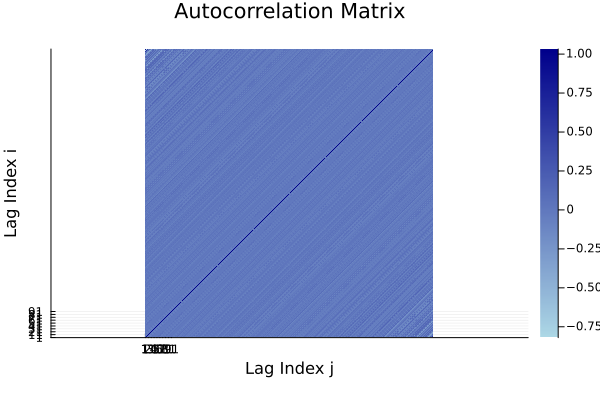

In [8]:
# Plot the autocorrelation matrix
heatmap(𝑅ₓₓ, color=:blues, aspect_ratio=:equal,
        title="Autocorrelation Matrix",
        xlabel="Lag Index j",
        ylabel="Lag Index i",
        xticks=(1:10:100, string.(1:10:100)),
        yticks=(1:10:100, string.(1:10:100)),
        clims=(minimum(𝑅ₓₓ), maximum(𝑅ₓₓ)))